In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
file_path = "merged_file.csv"  
filtered_data = pd.read_csv(file_path)

In [4]:
filtered_data['Block'] = filtered_data[' Location'].str.extract(r'(\d+)$')
filtered_data['Block'] = pd.to_numeric(filtered_data['Block'])

In [6]:
filtered_data['Floor'] = filtered_data[' Location'].str.extract(r'LAB_(\d+)')

In [8]:
filtered_data['Area'] = filtered_data[' Location'].str.extract(r'M_(\w+)_')

In [10]:
filtered_data['Floor'] = filtered_data['Floor'].astype(int)

In [11]:
area_mapping = {chr(i): idx for idx, i in enumerate(range(ord('A'), ord('Q') + 1), start=1)}
filtered_data['Area'] = filtered_data['Area'].map(area_mapping)

In [13]:
filtered_data[' BSSID'] = filtered_data[' BSSID'].str.strip()

In [15]:
unique_ssid_values = filtered_data[' SSID'].unique()
print(unique_ssid_values)

[' LAB.EXT.SF-EE89sItIUl1AQzs' ' DAIICT_STAFF' ' Attendance'
 ' DAIICT_Student' ' DA_Public' ' Utsav_LAB_PC' ' Recover.Me-3D84E0'
 ' OnePlus 11R 5G' ' Lab_211_5G' ' TP-Link_13F8_5G_203' ' dasolarpnl'
 ' Lab_211' ' OnePlus 9R' ' TP-Link_13F8_203' ' PC-2' ' ' ' Galaxy A53 5G'
 ' Donation' ' AP_1723919793' ' OnePlus Nord CE 2' ' ROBOTIC_LAB'
 ' OnePlus Nord 3 5G' ' ESP_612376' ' Dell-Gujcost' " Rishikesh's A15 5G"
 ' Udi BaBa' ' Pls Dont' ' narzo 50 Pro 5G' ' DIRECT-KTDINESHmsbM' ' Dev'
 ' VM_31' ' Pradhanmantri Wi-fi Dilaao Yojna' ' OnePlus Nord CE4'
 ' DIRECT-MzDESKTOP-1A0KK0QmsTF' ' Garib_Wifi_Yojna' ' NARZO 70x 5G'
 ' Harsh Thakkar' ' Dhruv' ' vivo Y73' ' NARZO 70 Pro 5G' ' POCO X3 Pro'
 ' POCO X5 Pro 5G' ' SUBHENDU' ' ROBOTIC_LAB-5G' ' OnePlus Nord'
 ' Redmi Note 12 5G' ' vivo 1901' ' SDSESTAHOT' ' MATRIX 5746' ' MANAV'
 " Not ur dad's wifi" ' ESP_8A2DB9' ' ESP_9453FB' ' realme 10 Pro 5G'
 ' Prayag' ' iPhone 12' ' DIRECT-duLAPTOP-6IUKR5PCmsSy' ' DHRUVIN'
 ' Pixel 6a' ' D-Link_DIR-600

In [16]:
unwanted_ssids =[' LAB.EXT.SF-EE89sItIUl1AQzs',' Utsav_LAB_PC',' Recover.Me-3D84E0',' OnePlus 11R 5G',
                 ' OnePlus 9R',' ',' Galaxy A53 5G',' Donation',' AP_1723919793',' OnePlus Nord CE 2',
                 ' OnePlus Nord 3 5G',' ESP_612376',' Dell-Gujcost',"Rishikesh's A15 5G",'Udi BaBa',
                 ' Pls Dont',' narzo 50 Pro 5G',' DIRECT-KTDINESHmsbM',' Dev',' VM_31',
                 ' Pradhanmantri Wi-fi Dilaao Yojna',' OnePlus Nord CE4',' DIRECT-MzDESKTOP-1A0KK0QmsTF',
                 ' Garib_Wifi_Yojna',' NARZO 70x 5G',' Harsh Thakkar',' Dhruv',' vivo Y73',
                 ' NARZO 70 Pro 5G',' POCO X3 Pro',' POCO X5 Pro 5G',' SUBHENDU',' OnePlus Nord',
                 ' Redmi Note 12 5G',' vivo 1901',' SDSESTAHOT',' MATRIX 5746',' MANAV',
                 " Not ur dad's wifi",' ESP_8A2DB9',' ESP_9453FB',' realme 10 Pro 5G',' Prayag',
                 ' iPhone 12',' DIRECT-duLAPTOP-6IUKR5PCmsSy',' DHRUVIN',' Pixel 6a',' D-Link_DIR-600M',
                 ' MIHIR',' DESKTOP-Q1AQH35 4278',' SifySMAC3_20ATB0101304',' SifySMAC3_19AT90301566',
                 ' Redmi Note 10',' OnePlus NORD 2 5G',' C:\\Virus_Infected',' Robo_Ant2',
                 ' JioAirfiberA6',' Blek niga',' Mi 11X',' DIRECT-NzMOINUDDINHOLYmsGH',' iPhone 13pro',
                 ' vivo Y72 5G',' DIRECT-oODESKTOP-VETLBUQmsyL',' MIFI_DA0E',' LordOfThePings',
                 ' OnePlus 11R',' Mikey',' Lenovo Thinkpad'," Preksha's S23 FE", ' Infinix HOT 30i',
                 ' MIFI_7D76',' realme GT Master Edition',' No Internet',' 202311017',' Nirav',' Yo',
                 ' Galaxy A32CACC',' MIFI_0236',' Abhi',' Redmi Pad',' DarkNight',' realme 6',' MayDEEP',
                 ' Redmi 12 5G'," Harmit's internet ",' ZEEL',' OnePlus Nord CE 2 Lite 5G',' Satyajeet',
                 ' vivo V30',' Gbo7-2',' Pixel_7310',' Nokia 6.1 Plus','LAB.EXT.SF-EE89sItIUl1AQzs',
                 'AP_1723919793','UdiBaBa','JioAirfiberA6','Dell-Gujcost','Nokia6.1Plus','Robo_Ant2',
                 'Pixel_7310','ESP_8A2DB9','Pocket-wifi',' DIRECT-KgDESKTOP-8PLPL9Qms4a',
                 ' SifySMAC3_19AT90100036',' 0006ae9b0e72',' RS Corporation'," Hiten's A54",
                 ' nw_info to Avanew',' UJJWAL 7034',' Manan',' LAPTOP-QEOG4J8G 6610',
                 ' DIRECT-BFVISHAmsVL',' vivo T1 Pro 5G',' SifySMAC3_19AT90100392'," Dhruvil's hotspot",
                 ' Redmi note 12 pro 5g', " Rishikesh's A15 5G",' Udi BaBa']

In [18]:
filtered_data = filtered_data[~filtered_data[' SSID'].isin(unwanted_ssids)]

In [30]:
unique_ssid_values = filtered_data[' SSID'].unique()
print(unique_ssid_values)

['DAIICT_STAFF' 'DAIICT_Student' 'DA_Public']


In [24]:
unwanted_ssids2=[' Attendance',' Lab_211_5G',' TP-Link_13F8_5G_203',' dasolarpnl',' Lab_211',
 ' TP-Link_13F8_203',' PC-2',' ROBOTIC_LAB',' ROBOTIC_LAB-5G',' LAB013',
 ' LAB0133','Attendance','Lab_211_5G','TP-Link_13F8_5G_203','dasolarpnl','Lab_211',
 'TP-Link_13F8_203','PC-2','ROBOTIC_LAB','ROBOTIC_LAB-5G']

In [25]:
filtered_data = filtered_data[~filtered_data[' SSID'].isin(unwanted_ssids2)]

In [27]:
filtered_data = filtered_data.dropna(subset=[' SSID'])

In [29]:
filtered_data[' SSID'] = filtered_data[' SSID'].replace(' DAIICT_STAFF', 'DAIICT_STAFF')
filtered_data[' SSID'] = filtered_data[' SSID'].replace(' DAIICT_Student', 'DAIICT_Student')
filtered_data[' SSID'] = filtered_data[' SSID'].replace(' DA_Public', 'DA_Public')

In [32]:
unique_bssid_values = filtered_data[' BSSID'].unique()
print(unique_bssid_values)

['18:4b:0d:23:60:78' '44:1e:98:fb:55:d8' '44:1e:98:3b:55:dc'
 '44:1e:98:bb:55:d8' '60:d0:2c:9f:63:98' '60:d0:2c:df:63:98'
 '44:1e:98:bb:55:dc' '44:1e:98:3b:55:d8' '18:4b:0d:a3:60:78'
 '18:4b:0d:e3:60:78' '44:1e:98:fb:55:dc' '18:4b:0d:dc:30:98'
 '18:4b:0d:1c:30:98' '60:d0:2c:df:63:9c' '18:4b:0d:a3:75:38'
 '18:4b:0d:e3:75:38' '18:4b:0d:9c:30:98' '24:79:2a:34:ea:0d'
 '18:4b:0d:dc:30:9c' '58:b6:33:fa:1c:dc' '24:79:2a:74:ea:0c'
 '58:b6:33:3a:1c:dc' '60:d0:2c:1f:63:98' '58:b6:33:ba:1c:dc'
 '60:d0:2c:9f:63:9c' '18:4b:0d:1c:30:9c' '18:4b:0d:9c:30:9c'
 '60:d0:2c:1f:63:9c' '24:79:2a:f4:ea:0c' '24:79:2a:f4:ea:08'
 '24:79:2a:74:ea:08' '24:79:2a:34:ea:09' '58:b6:33:3a:1c:d8'
 '58:b6:33:ba:1c:d8' '58:b6:33:fa:1c:d8' '18:4b:0d:a3:75:3c'
 '18:4b:0d:e3:75:3c' '18:4b:0d:23:75:38' '18:4b:0d:e3:60:7c'
 '18:4b:0d:23:60:7c' '18:4b:0d:a3:60:7c' '18:4b:0d:23:75:3c'
 '1c:b9:c4:3d:84:e8' '1c:b9:c4:fd:84:e8' '1c:b9:c4:bd:84:e8'
 '1c:b9:c4:bd:84:ec' '1c:b9:c4:3d:84:ec' '1c:b9:c4:fd:84:ec'
 '2c:c5:d3:e0:f8:b8' '2c

In [ ]:
filtered_data[' Frequency'] = filtered_data[' Frequency'].str.replace('MHz', '').astype(int) 

C:\Users\ditis\AppData\Local\Temp\ipykernel_20056\2849490373.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data[numeric_columns].corr()


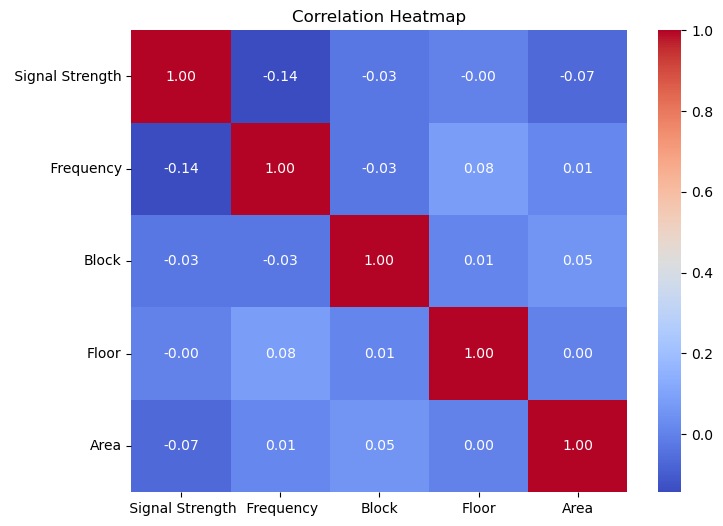

In [35]:
numeric_columns = [' Signal Strength', ' Frequency', 'Block', 'Floor','Area',' BSSID']
correlation_matrix = filtered_data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
filtered_data['Time'] = filtered_data[' Location'].str.extract(r'_(\d+)(?:AM|PM)').astype(int) 

In [38]:
filtered_data.to_csv('data.csv', index=False)

In [37]:
print(filtered_data.columns)

Index(['Timestamp', ' Location', ' SSID', ' BSSID', ' Signal Strength',
       ' Frequency', 'Block', 'Floor', 'Area'],
      dtype='object')


In [5]:
filtered_data

,Location,Block,Floor,Area,18:4b:0d:23:60:78,44:1e:98:fb:55:d8,44:1e:98:3b:55:dc,44:1e:98:bb:55:d8,60:d0:2c:9f:63:98,60:d0:2c:df:63:98,...,d8:38:fc:b5:dd:2c,d8:38:fc:35:d6:28,d8:38:fc:75:d6:28,20:58:69:b9:70:e8,d8:38:fc:b8:bc:38,5c:df:89:1a:c4:08,80:03:84:da:69:68,24:79:2a:f4:ea:38,24:79:2a:b4:ea:38,Time
0,LAB_0_12PM_A_1,1,0,1.0,-76,-71,-63,-70,-64,-64,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,12
1,LAB_0_12PM_A_10,10,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,12
2,LAB_0_12PM_A_11,11,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,12
3,LAB_0_12PM_A_12,12,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,12
4,LAB_0_12PM_A_2,2,0,1.0,-110,-71,-110,-70,-60,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,LAB_1_9AM_Q_5,5,1,17.0,-82,-75,-87,-76,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,9
1182,LAB_1_9AM_Q_6,6,1,17.0,-110,-78,-88,-78,-61,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,9
1183,LAB_1_9AM_Q_7,7,1,17.0,-75,-77,-86,-77,-61,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,9
1184,LAB_1_9AM_Q_8,8,1,17.0,-75,-76,-87,-77,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,9


In [39]:
# Extract all unique BSSID values to serve as columns
unique_bssids = filtered_data[' BSSID'].unique()

# Group data by ' Location' and retain 'Block', 'Floor', and 'Area' for each location
grouped_data = filtered_data.groupby([' Location', 'Block', 'Floor', 'Area'])

# Initialize the transformed DataFrame
transformed_data = []

# Process each group
for (location, block, floor, area), group in grouped_data:
    # Create a row with default signal strength (-110) for all BSSIDs
    row = {bssid: -110 for bssid in unique_bssids}
    # Update the row with actual signal strengths from the group
    row.update(group.set_index(' BSSID')[' Signal Strength'].to_dict())
    # Add metadata columns
    row.update({' Location': location, 'Block': block, 'Floor': floor, 'Area': area})
    transformed_data.append(row)

# Convert the list of rows into a DataFrame
transformed_df = pd.DataFrame(transformed_data)

# Move metadata columns to the front for better readability
metadata_columns = [' Location', 'Block', 'Floor', 'Area']
transformed_df = transformed_df[metadata_columns + [col for col in transformed_df.columns if col not in metadata_columns]]

# Display the transformed DataFrame
transformed_df.head()

,Location,Block,Floor,Area,18:4b:0d:23:60:78,44:1e:98:fb:55:d8,44:1e:98:3b:55:dc,44:1e:98:bb:55:d8,60:d0:2c:9f:63:98,60:d0:2c:df:63:98,...,d8:38:fc:75:dc:e8,d8:38:fc:b5:dd:2c,d8:38:fc:35:d6:28,d8:38:fc:75:d6:28,20:58:69:b9:70:e8,d8:38:fc:b8:bc:38,5c:df:89:1a:c4:08,80:03:84:da:69:68,24:79:2a:f4:ea:38,24:79:2a:b4:ea:38
0,LAB_0_12PM_A_1,1,0,1.0,-76,-71,-63,-70,-64,-64,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
1,LAB_0_12PM_A_10,10,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
2,LAB_0_12PM_A_11,11,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
3,LAB_0_12PM_A_12,12,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
4,LAB_0_12PM_A_2,2,0,1.0,-110,-71,-110,-70,-60,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110


In [13]:
transformed_df.to_csv('final_ig.csv', index=False)

In [41]:
transformed_df

,Location,Block,Floor,Area,18:4b:0d:23:60:78,44:1e:98:fb:55:d8,44:1e:98:3b:55:dc,44:1e:98:bb:55:d8,60:d0:2c:9f:63:98,60:d0:2c:df:63:98,...,d8:38:fc:75:dc:e8,d8:38:fc:b5:dd:2c,d8:38:fc:35:d6:28,d8:38:fc:75:d6:28,20:58:69:b9:70:e8,d8:38:fc:b8:bc:38,5c:df:89:1a:c4:08,80:03:84:da:69:68,24:79:2a:f4:ea:38,24:79:2a:b4:ea:38
0,LAB_0_12PM_A_1,1,0,1.0,-76,-71,-63,-70,-64,-64,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
1,LAB_0_12PM_A_10,10,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
2,LAB_0_12PM_A_11,11,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
3,LAB_0_12PM_A_12,12,0,1.0,-110,-81,-110,-80,-52,-52,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
4,LAB_0_12PM_A_2,2,0,1.0,-110,-71,-110,-70,-60,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,LAB_1_9AM_Q_5,5,1,17.0,-82,-75,-87,-76,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
1182,LAB_1_9AM_Q_6,6,1,17.0,-110,-78,-88,-78,-61,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
1183,LAB_1_9AM_Q_7,7,1,17.0,-75,-77,-86,-77,-61,-61,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
1184,LAB_1_9AM_Q_8,8,1,17.0,-75,-76,-87,-77,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,-110,-110,-110
